In [1]:
import folium
import pandas as pd
import numpy as np
import geopandas as gpd
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

import networkx as nx



In [2]:
%%time


# Load & Read GeoJSON file

# file_path = "/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/physical_grid_data/US_Electric_Power_Transmission_Lines_-3845977064911730921.geojson"
# gdf = gpd.read_file(file_path)
# # gdf = gdf.to_crs(epsg=3857)
# gdf = gdf.to_crs(epsg=4326)
 

# # Convert timeframes to folium-friendly types
# gdf['SOURCEDATE'] = pd.to_datetime(gdf['SOURCEDATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')
# gdf['VAL_DATE'] = pd.to_datetime(gdf['VAL_DATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')


file_path = "/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/physical_grid_data/U.S._Electric_Power_Transmission_Lines.geojson"
gdf = gpd.read_file(file_path)
# gdf = gdf.to_crs(epsg=3857)
# gdf = gdf.to_crs(epsg=4326)

 

# Convert timeframes to folium-friendly types
gdf['SOURCEDATE'] = pd.to_datetime(gdf['SOURCEDATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')
gdf['VAL_DATE'] = pd.to_datetime(gdf['VAL_DATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')




CPU times: user 29.7 s, sys: 303 ms, total: 30 s
Wall time: 30.2 s


Text(0.5, 1.0, 'Major US Transmission Lines')

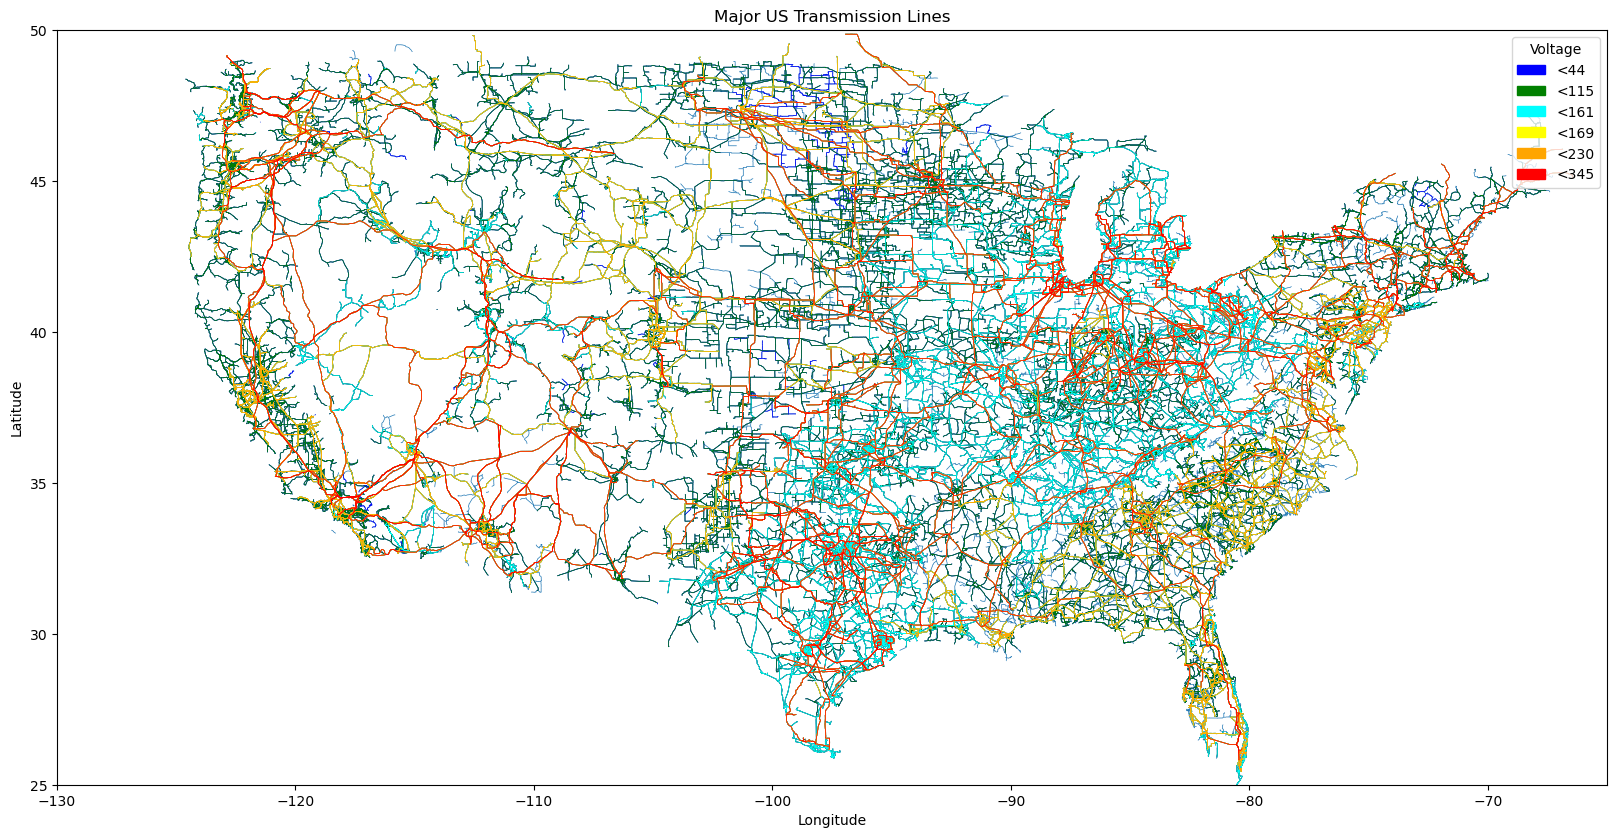

In [7]:
# Plot the GeoDataFrame
map = gdf.plot(figsize=(20, 16),linewidth=0.5)

# Define common voltages and corresponding colors
common_voltages = [0, 44, 115, 161, 169, 230, 345]

hex_colors = ['blue','green', 'cyan', 'yellow', 'orange', 'red']
legend_labels = ['<' + str(i) for i in common_voltages[1:]]

# Plot overlays for each common voltage
for voltage, color, label in zip(common_voltages, hex_colors, legend_labels):
    overlay = gdf[gdf['VOLTAGE'] > voltage]  # Filter GeoDataFrame based on voltage
    overlay.plot(ax=map, marker='o', color=color, markersize=5, linewidth=0.5, label=label)
    
# Create a custom legend with colored patches
legend_handles = [Patch(color=color, label=label) for color, label in zip(hex_colors, legend_labels)]

# Add legend
map.legend(handles=legend_handles, title='Voltage', loc='upper right')

# Set xy axis limits
map.set_xlim((-130, -65))
map.set_ylim((25,50))

# Put labels on the map
map.set_xlabel("Longitude")
map.set_ylabel("Latitude")
map.set_title("Major US Transmission Lines")


In [8]:
gdf

,FID,OBJECTID,ID,TYPE,STATUS,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,...,OWNER,VOLTAGE,VOLT_CLASS,INFERRED,SUB_1,SUB_2,SHAPE__Len,GlobalID,SHAPE_Length,geometry
0,1,501,135919,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 860",2014-08-04T00:00:00,IMAGERY,...,NOT AVAILABLE,69.0,UNDER 100,Y,UNKNOWN115865,TAP142941,29.188701,{73B386A9-AE19-4673-AE34-A87E1E490FE1},0.000227,"MULTILINESTRING ((-92.27198 30.22732, -92.2720..."
1,2,502,141425,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 861",2014-04-07T00:00:00,IMAGERY,...,ALABAMA POWER CO,115.0,100-161,Y,UNKNOWN109093,TAP142857,74.705018,{9EA82903-87B1-4BB6-84B5-9B372F739699},0.000583,"MULTILINESTRING ((-87.82312 30.60263, -87.8232..."
2,3,503,141426,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,IMAGERY,2014-07-15T00:00:00,IMAGERY,...,"DUKE ENERGY CAROLINAS, LLC",100.0,100-161,Y,UNKNOWN115051,TAP154872,70.223774,{6008C7EC-8421-487A-9CB1-22801412BEB7},0.000591,"MULTILINESTRING ((-81.85754 35.03416, -81.8580..."
3,4,504,141429,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, http://www.oatioasis.c...",2014-07-08T00:00:00,IMAGERY,...,TENNESSEE VALLEY AUTHORITY,161.0,100-161,N,FORT PAYNE PRIMARY,TAP152965,12929.295887,{1678DB1B-7C05-4927-A0FA-7E9011CABC1A},0.109258,"MULTILINESTRING ((-85.68872 34.47813, -85.6893..."
4,5,505,141422,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 861, EIA 860",2015-05-28T00:00:00,IMAGERY,...,COMMONWEALTH EDISON CO,138.0,100-161,Y,UNKNOWN121903,TAP137923,1737.440378,{DE001834-13ED-4FE4-96CC-789BDF3B01F9},0.012158,"MULTILINESTRING ((-87.96213 42.03757, -87.9625..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93042,93043,93043,315082,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,Western Electricity Coordinating Council https...,2017-01-01T00:00:00,IMAGERY/OTHER,...,NOT AVAILABLE,230.0,220-287,N,TAP317033,LONE BUTTE,3437.236752,{99755F96-1FD1-403B-9A00-7351EF073AA3},0.025857,"MULTILINESTRING ((-111.99586 33.22352, -111.99..."
93043,93044,93044,315083,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap",2019-11-23T00:00:00,IMAGERY,...,"ENTERGY TEXAS, INC.",138.0,100-161,Y,TAP316626,TAP316629,3287.127256,{4DD4F2D4-470F-4C1F-9948-C28B485F733D},0.028136,"MULTILINESTRING ((-94.06849 30.05597, -94.0669..."
93044,93045,93045,315084,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap",2019-11-23T00:00:00,IMAGERY,...,"ENTERGY TEXAS, INC.",138.0,100-161,Y,TAP316627,TAP316630,103.168311,{1FFEACEF-46E0-49EA-9367-CBD918C10A35},0.000803,"MULTILINESTRING ((-94.06840 30.05450, -94.0684..."
93045,93046,93046,315085,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap",2019-11-23T00:00:00,IMAGERY,...,"ENTERGY TEXAS, INC.",138.0,100-161,Y,TAP316630,TAP316629,90.248211,{CDB30F46-7C14-47A6-A16F-E8ED2DC404F1},0.000707,"MULTILINESTRING ((-94.06846 30.05530, -94.0685..."


In [14]:
# Load California shape file
ca_boundaries_file = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/location_data/ca_state/CA_State.shp'
ca_boundaries = gpd.read_file(ca_boundaries_file)
    
    
ca_boundaries = ca_boundaries.to_crs('EPSG:4326')

    
    

In [15]:
ca_boundaries

,OBJECTID,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,56,4,9,06,01779778,06,CA,California,00,G4000,A,4.034672e+11,2.049980e+10,+37.1551773,-119.5434183,5.258041e+06,5.258041e+06,6.718927e+11,"MULTIPOLYGON (((-117.32095 32.68985, -117.3218..."


Text(0.5, 1.0, 'Major US Transmission Lines')

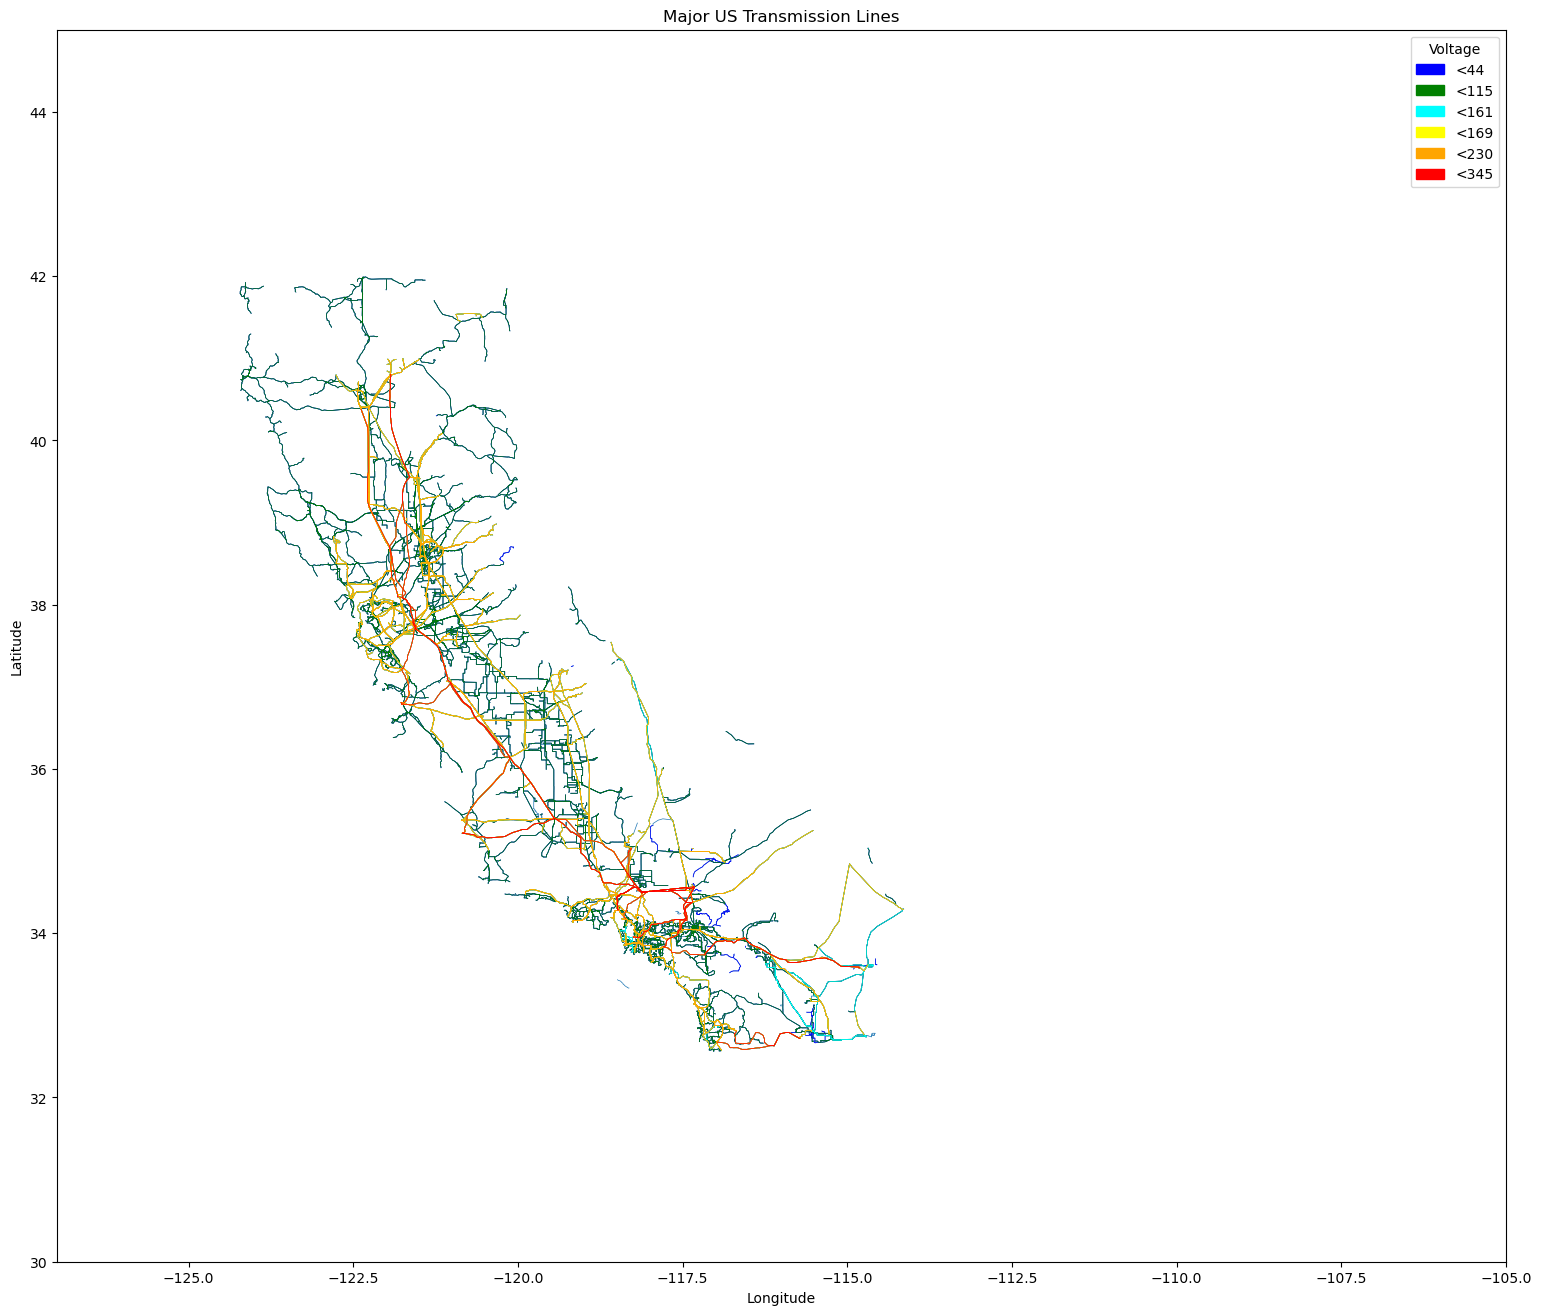

In [19]:
# Assuming your GeoPandas DataFrame is named 'gdf', filter the data within California
data_within_california = gdf[gdf.geometry.within(ca_boundaries.geometry.iloc[0])]

# # Plot the data within California
# ax = ca_boundaries.plot(color='lightgray', edgecolor='black')
# data_within_california.plot(ax=ax, color='blue', markersize=5)

map = data_within_california.plot(figsize=(20, 16),linewidth=0.5)

# Define common voltages and corresponding colors
common_voltages = [0, 44, 115, 161, 169, 230, 345]

hex_colors = ['blue','green', 'cyan', 'yellow', 'orange', 'red']
legend_labels = ['<' + str(i) for i in common_voltages[1:]]

# Plot overlays for each common voltage
for voltage, color, label in zip(common_voltages, hex_colors, legend_labels):
    overlay = data_within_california[data_within_california['VOLTAGE'] > voltage]  # Filter GeoDataFrame based on voltage
    overlay.plot(ax=map, marker='o', color=color, markersize=5, linewidth=0.5, label=label)
    
# Create a custom legend with colored patches
legend_handles = [Patch(color=color, label=label) for color, label in zip(hex_colors, legend_labels)]

# Add legend
map.legend(handles=legend_handles, title='Voltage', loc='upper right')

# Set xy axis limits
map.set_xlim((-127, -105))
map.set_ylim((30,45))

# Put labels on the map
map.set_xlabel("Longitude")
map.set_ylabel("Latitude")
map.set_title("Major California Transmission Lines")



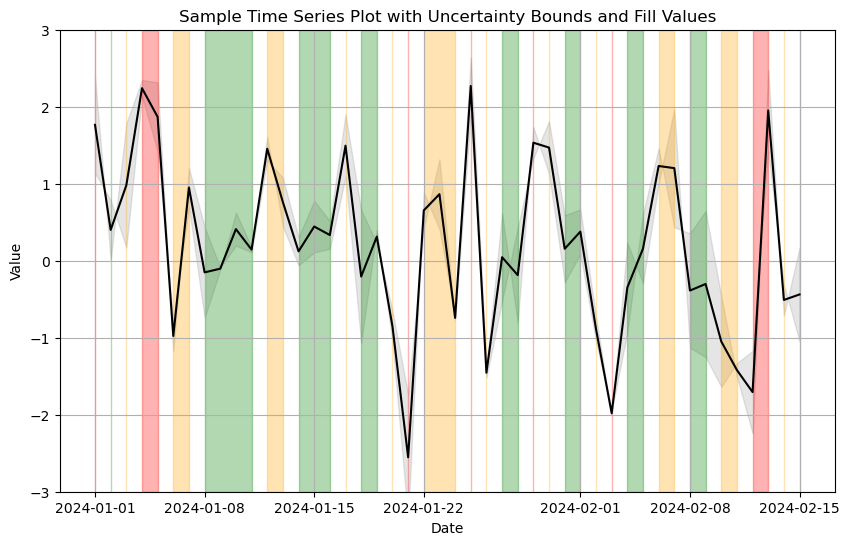

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate fake time series data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', end='2024-02-15', freq='D')
values = np.random.normal(loc=0, scale=1, size=len(dates))

# Generate uncertainty bounds
uncertainty = np.random.normal(loc=0, scale=0.5, size=len(dates))
lower_bound = values - uncertainty
upper_bound = values + uncertainty

# Plot time series with uncertainty bounds
plt.figure(figsize=(10, 6))
plt.plot(dates, values, color='black', label='Time Series')
plt.fill_between(dates, lower_bound, upper_bound, color='gray', alpha=0.2, label='Uncertainty Bounds')

# Plot fill values based on specified conditions
plt.fill_between(dates, -3, 3, where=(values >= -0.5) & (values <= 0.5), color='green', alpha=0.3, label='[-1, 1]')
plt.fill_between(dates, -3, 3, where=(abs(values) > 0.5) & (abs(values) <= 1.5), color='orange', alpha=0.3, label='(1, 2]')
plt.fill_between(dates, -3, 3, where=abs(values) > 1.5, color='red', alpha=0.3, label='> 2')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sample Time Series Plot with Uncertainty Bounds and Fill Values')
# plt.legend()
plt.grid(True)
plt.ylim(-3, 3)  # Set y-axis limit
plt.show()
